In [ ]:
#import files
#  Load the uploaded Excel file into a DataFrame
import pandas as pd

# Replace with the exact filename if different
df = pd.read_excel("C:\\Users\\Student\\Downloads\\amazon reviews.xlsx") # Changed to read_excel and updated filename

# Step 3: Preview the dataset
print(" First 15000 rows:")
print(df.head(15000))

print("\n Column names:")
print(df.columns)

print("\n Sentiment distribution:")
print(df['sentiment'].value_counts())

 First 15000 rows:
       review_id product_category    product_name user_id review_title  \
0            NaN           Beauty        Lipstick   U6138         Okay   
1          466.0            Books   Fiction Novel   U5171         Okay   
2          610.0      Electronics      Smartphone   U8656     Loved it   
3           48.0            Books        Cookbook   U1929     Not good   
4          904.0          Fashion        Sneakers   U6803     Loved it   
...          ...              ...             ...     ...          ...   
14995      217.0            Books       Biography   U3363     Terrible   
14996      706.0            Books       Biography   U9624         Okay   
14997      436.0            Books  Self-help Book     NaN     Terrible   
14998        NaN   Home & Kitchen       Air Fryer   U3678       Great!   
14999      709.0      Electronics          Laptop     NaN       Great!   

                                         review_text  rating  \
0      The Lipstick works ok

In [20]:
import pandas as pd

# Load the dataset
df = pd.read_excel("C:\\Users\\Student\\Downloads\\amazon reviews.xlsx")

# Preview the data
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check sentiment distribution
print(df['sentiment'].value_counts())

   review_id product_category   product_name user_id review_title  \
0        NaN           Beauty       Lipstick   U6138         Okay   
1      466.0            Books  Fiction Novel   U5171         Okay   
2      610.0      Electronics     Smartphone   U8656     Loved it   
3       48.0            Books       Cookbook   U1929     Not good   
4      904.0          Fashion       Sneakers   U6803     Loved it   

                                     review_text  rating verified_purchase  \
0  The Lipstick works okay, but could be better.     4.0               Yes   
1                                            NaN     1.0                No   
2   The Smartphone stopped working after a week.     5.0                No   
3           Decent Cookbook for the price point.     4.0               Yes   
4            The Sneakers is amazing, I love it!     3.0               Yes   

   helpful_votes sentiment  
0           21.0  Positive  
1           18.0  Negative  
2           18.0  Positive  


 Missing values per column:
review_id            767
product_category     771
product_name         774
user_id              774
review_title         768
review_text          771
rating               768
verified_purchase    779
helpful_votes        766
sentiment            769
dtype: int64

 Duplicate rows: 8543

 Sentiment distribution:
sentiment
Negative    6349
Positive    5536
Neutral     2796
Name: count, dtype: int64


C:\Users\Student\AppData\Local\Temp\ipykernel_8988\735679705.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive', 'Negative', 'Neutral'], palette='Set2')


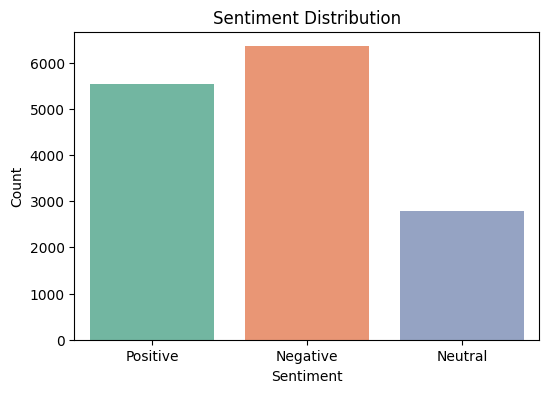

C:\Users\Student\AppData\Local\Temp\ipykernel_8988\735679705.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


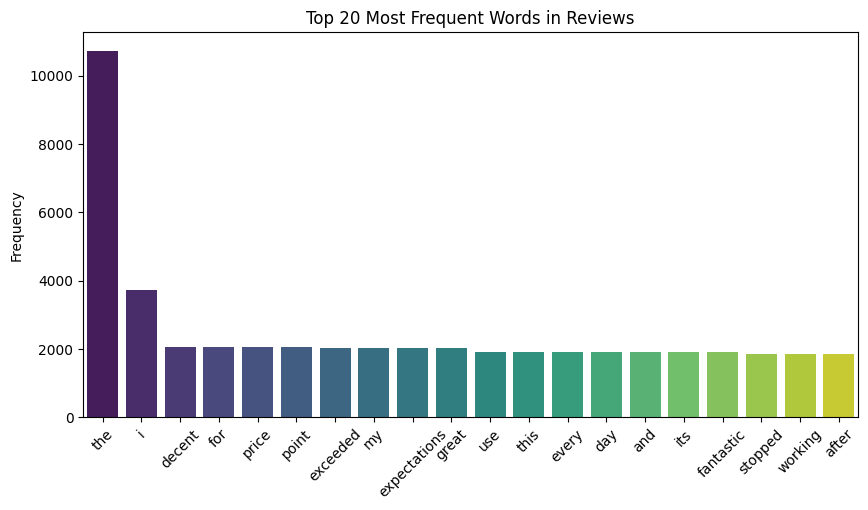


✅ Cleaned dataset saved as 'amazon reviews_cleaned.csv'


In [1]:


# Step 2: Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load CSV
df = pd.read_excel("C:\\Users\\Student\\Downloads\\amazon reviews.xlsx")

# Check for missing values
print(" Missing values per column:")
print(df.isnull().sum())

#  Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")

# Analyze sentiment distribution
print("\n Sentiment distribution:")
print(df['sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Negative', 'Neutral'], palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#  Word frequency in review_text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

all_words = ' '.join(df['review_text'].dropna().apply(clean_text)).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot top 20 words
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews")
plt.ylabel("Frequency")
plt.show()

#  Remove duplicates
df_cleaned = df.drop_duplicates()

# Handle missing/improper values (none found earlier)
# If needed: df_cleaned = df_cleaned.dropna()

#  Save cleaned dataset
df_cleaned.to_csv("amazon reviews_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'amazon reviews_cleaned.csv'")

                 Model  Accuracy  Precision    Recall  F1 Score
4        Decision Tree  0.508342   0.497340  0.508342  0.497465
3                  SVM  0.508682   0.494233  0.508682  0.493560
2        Random Forest  0.505958   0.492676  0.505958  0.492696
5                  KNN  0.487232   0.473674  0.487232  0.477351
0  Logistic Regression  0.452503   0.363936  0.452503  0.396408
1          Naive Bayes  0.443650   0.358361  0.443650  0.395872


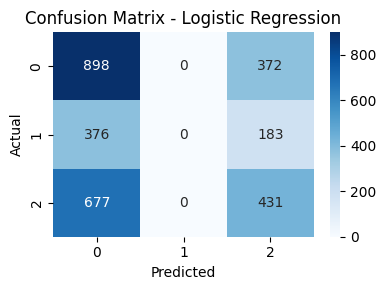

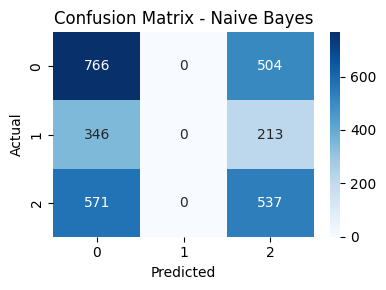

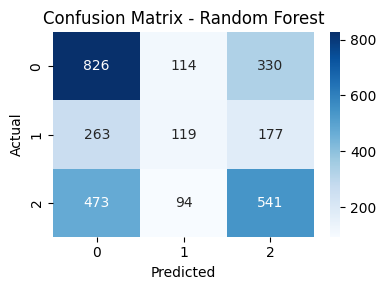

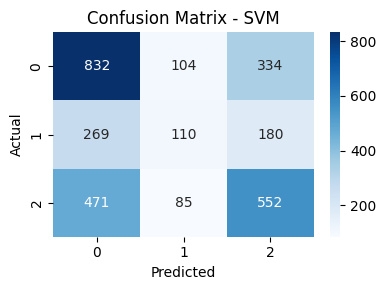

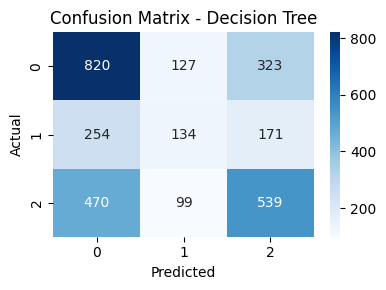

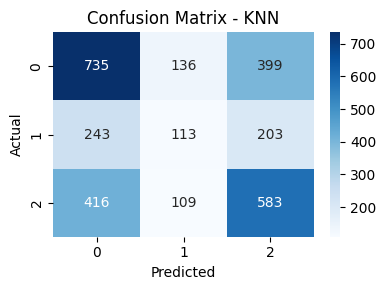

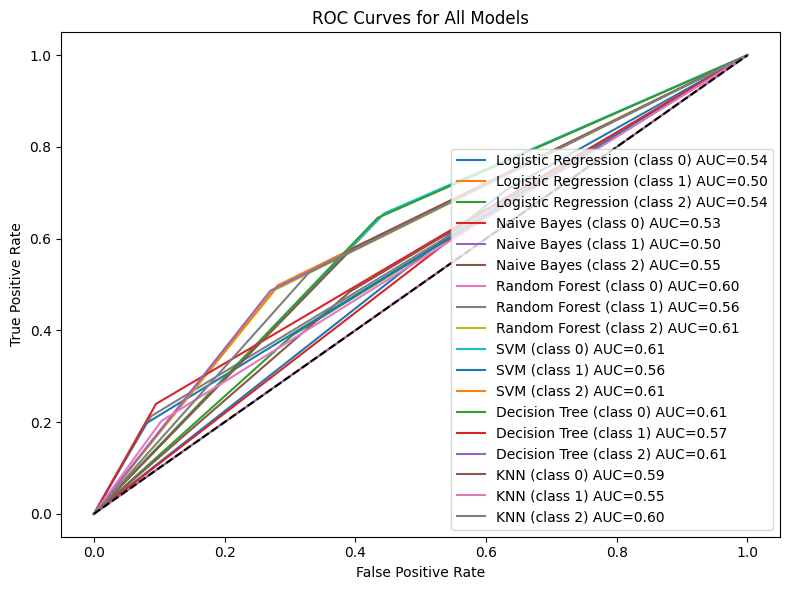

✅ Evaluation complete. Metrics saved to 'model_evaluation_metrics.csv'


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load and clean data
df = pd.read_excel("C:\\Users\\Student\\Downloads\\amazon reviews.xlsx")
df['review_text'] = df['review_text'].astype(str).str.lower()
df['review_text'] = df['review_text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))
df['sentiment'] = df['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
df = df.dropna(subset=['review_text', 'sentiment'])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review_text'])
y = df['sentiment']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Train models
logreg_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
nb_model = MultinomialNB().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
svm_model = SVC(probability=True).fit(X_train, y_train)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)

#  Make predictions
model_predictions = {
    'Logistic Regression': logreg_model.predict(X_test),
    'Naive Bayes': nb_model.predict(X_test),
    'Random Forest': rf_model.predict(X_test),
    'SVM': svm_model.predict(X_test),
    'Decision Tree': dt_model.predict(X_test),
    'KNN': knn_model.predict(X_test)
}

# Step 7: Evaluate models
metrics = []
for name, y_pred in model_predictions.items():
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

metrics_df = pd.DataFrame(metrics).sort_values(by='F1 Score', ascending=False)
print(metrics_df)

# Step 8: Confusion matrices
for name, y_pred in model_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Step 9: ROC/AUC curves
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plt.figure(figsize=(8, 6))
for name, y_pred in model_predictions.items():
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (class {i}) AUC={roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Step 10: Save metrics
metrics_df.to_csv("model_evaluation_metrics.csv", index=False)
print("✅ Evaluation complete. Metrics saved to 'model_evaluation_metrics.csv'")

                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.507320   0.496848  0.507320  0.498188
4        Decision Tree  0.508342   0.497340  0.508342  0.497465
3                  SVM  0.508682   0.494233  0.508682  0.493560
5                  KNN  0.487232   0.473674  0.487232  0.477351
0  Logistic Regression  0.452503   0.363936  0.452503  0.396408
1          Naive Bayes  0.443650   0.358361  0.443650  0.395872


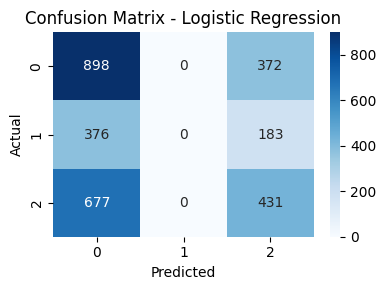

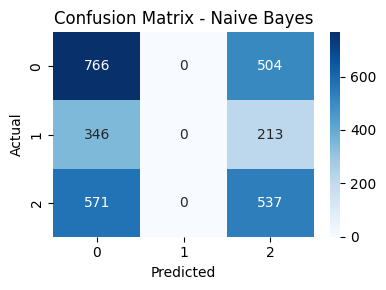

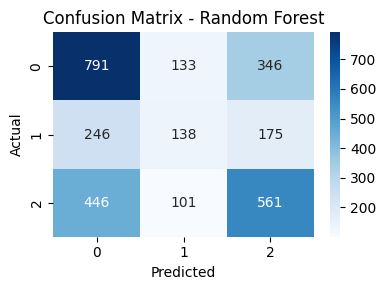

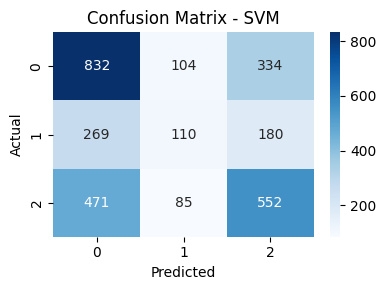

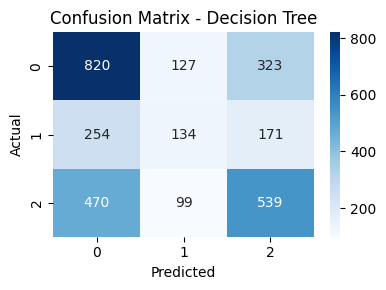

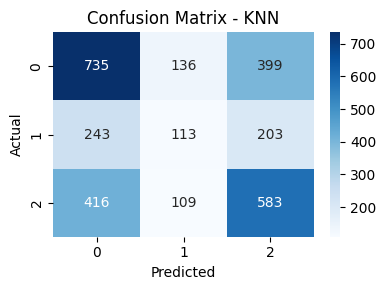

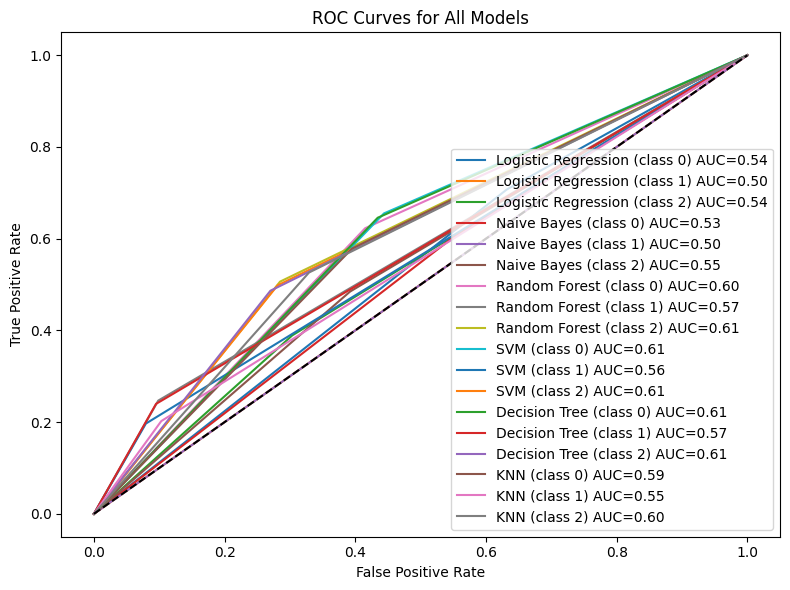

✅ Evaluation complete. Metrics saved to 'model_evaluation_metrics.csv'


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load and clean data
df = pd.read_excel("C:\\Users\\Student\\Downloads\\amazon reviews.xlsx")
df['review_text'] = df['review_text'].astype(str).str.lower()
df['review_text'] = df['review_text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))
df['sentiment'] = df['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
df = df.dropna(subset=['review_text', 'sentiment'])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review_text'])
y = df['sentiment']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Train models
logreg_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
nb_model = MultinomialNB().fit(X_train, y_train)
rf_model = RandomForestClassifier().fit(X_train, y_train)
svm_model = SVC(probability=True).fit(X_train, y_train)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)

#  Make predictions
model_predictions = {
    'Logistic Regression': logreg_model.predict(X_test),
    'Naive Bayes': nb_model.predict(X_test),
    'Random Forest': rf_model.predict(X_test),
    'SVM': svm_model.predict(X_test),
    'Decision Tree': dt_model.predict(X_test),
    'KNN': knn_model.predict(X_test)
}

# Step 7: Evaluate models
metrics = []
for name, y_pred in model_predictions.items():
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

metrics_df = pd.DataFrame(metrics).sort_values(by='F1 Score', ascending=False)
print(metrics_df)

# Step 8: Confusion matrices
for name, y_pred in model_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Step 9: ROC/AUC curves
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plt.figure(figsize=(8, 6))
for name, y_pred in model_predictions.items():
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (class {i}) AUC={roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Step 10: Save metrics
metrics_df.to_csv("model_evaluation_metrics.csv", index=False)
print("✅ Evaluation complete. Metrics saved to 'model_evaluation_metrics.csv'")